# Setup for Caffe


In [ ]:
!apt install caffe-cpu

In [2]:
import caffe
net = caffe.Net('/content/drive/My Drive/matroid_files/VGG_FACE_deploy.prototxt', caffe.TEST)

In [22]:
[(k, v.data.shape) for k, v in net.blobs.items()]


[('data', (1, 3, 224, 224)),
 ('conv1_1', (1, 64, 224, 224)),
 ('conv1_2', (1, 64, 224, 224)),
 ('pool1', (1, 64, 112, 112)),
 ('conv2_1', (1, 128, 112, 112)),
 ('conv2_2', (1, 128, 112, 112)),
 ('pool2', (1, 128, 56, 56)),
 ('conv3_1', (1, 256, 56, 56)),
 ('conv3_2', (1, 256, 56, 56)),
 ('conv3_3', (1, 256, 56, 56)),
 ('pool3', (1, 256, 28, 28)),
 ('conv4_1', (1, 512, 28, 28)),
 ('conv4_2', (1, 512, 28, 28)),
 ('conv4_3', (1, 512, 28, 28)),
 ('pool4', (1, 512, 14, 14)),
 ('conv5_1', (1, 512, 14, 14)),
 ('conv5_2', (1, 512, 14, 14)),
 ('conv5_3', (1, 512, 14, 14)),
 ('pool5', (1, 512, 7, 7)),
 ('fc6', (1, 4096)),
 ('fc7', (1, 4096)),
 ('fc8', (1, 2622)),
 ('prob', (1, 2622))]

# Convert Caffe weights to Keras weights (.h5 file)


In [ ]:
!wget https://raw.githubusercontent.com/pierluigiferrari/caffe_weight_converter/master/caffe_weight_converter.py

In [ ]:
!python caffe_weight_converter.py 'keras_weights' \
                                 '/content/drive/My Drive/matroid_files/VGG_FACE_deploy.prototxt' \
                                 '/content/drive/My Drive/matroid_files/VGG_FACE.caffemodel' \
                                 --verbose

# Model architecture/ Model definition


In [6]:
#model architecture in keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', name = 'conv1_1', padding = 'same', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name = 'conv1_2', padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=2, name = 'pool1'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', name = 'conv2_1', padding = 'same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', name = 'conv2_2', padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=2, name = 'pool2'))

model.add(layers.Conv2D(256, (3, 3), activation='relu', name = 'conv3_1', padding = 'same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', name = 'conv3_2', padding = 'same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', name = 'conv3_3', padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=2, name = 'pool3'))

model.add(layers.Conv2D(512, (3, 3), activation='relu', name = 'conv4_1', padding = 'same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', name = 'conv4_2', padding = 'same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', name = 'conv4_3', padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=2, name = 'pool4'))

model.add(layers.Conv2D(512, (3, 3), activation='relu', name = 'conv5_1', padding = 'same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', name = 'conv5_2', padding = 'same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', name = 'conv5_3', padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=2, name = 'pool5'))

model.add(Flatten())

model.add(layers.Dense(4096, activation='relu', name = 'fc6'))
model.add(layers.Dropout(0.5, name = 'drop6'))

model.add(layers.Dense(4096, activation='relu', name = 'fc7'))
model.add(layers.Dropout(0.5, name = 'drop7'))

#Load pretrained weights

In [7]:
model.load_weights('/content/keras_weights.h5', skip_mismatch=True, by_name=True)

In [8]:
for i in range(len(model.layers)):
  model.layers[i].trainable = False

# Add classifier layer for gender classification

In [9]:
model.add(layers.Dense(2, activation= 'softmax', name = 'prob', trainable=True))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 56, 56, 256)       2

In [ ]:
# !unzip /content/drive/My\ Drive/matroid_files/abc.zip

In [ ]:
# !mkdir data/
# !cp -r /content/female data/
# !cp -r /content/male data/

# Load data in Tensorflow Dataset format

In [12]:
import tensorflow as tf
from tensorflow.keras import preprocessing

data_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data',
    labels= "inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=128,
    image_size=(224, 224),
    shuffle=True,
    subset= 'training',
    seed=40,
    validation_split=0.2,
    interpolation="bilinear"
)

data_val = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data',
    labels= "inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=128,
    image_size=(224, 224),
    shuffle=True,
    subset= 'validation',
    seed=40,
    validation_split=0.2,
    interpolation="bilinear"
)

Found 33118 files belonging to 2 classes.
Using 26495 files for training.
Found 33118 files belonging to 2 classes.
Using 6623 files for validation.


#Training

In [13]:
from tensorflow.keras import metrics

model.compile(
  optimizer='adam',
  loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
history = model.fit(
    data_train, 
    validation_data = data_val, 
    epochs= 15
    )

Epoch 1/15
207/207 [==============================] - 175s 845ms/step - loss: 0.5476 - accuracy: 0.7493 - val_loss: 0.4853 - val_accuracy: 0.8221
Epoch 2/15
207/207 [==============================] - 166s 801ms/step - loss: 0.5086 - accuracy: 0.7907 - val_loss: 0.4667 - val_accuracy: 0.8431
Epoch 3/15
207/207 [==============================] - 166s 803ms/step - loss: 0.5015 - accuracy: 0.7991 - val_loss: 0.4664 - val_accuracy: 0.8395
Epoch 4/15
207/207 [==============================] - 165s 797ms/step - loss: 0.4967 - accuracy: 0.8054 - val_loss: 0.4562 - val_accuracy: 0.8516
Epoch 5/15
207/207 [==============================] - 165s 797ms/step - loss: 0.4950 - accuracy: 0.8068 - val_loss: 0.4515 - val_accuracy: 0.8621
Epoch 6/15
207/207 [==============================] - 164s 791ms/step - loss: 0.4945 - accuracy: 0.8076 - val_loss: 0.4517 - val_accuracy: 0.8563
Epoch 7/15
207/207 [==============================] - 164s 794ms/step - loss: 0.4942 - accuracy: 0.8072 - val_loss: 0.4645 -

#Save the model to final_tensorflow_model

In [24]:
model.save('/content/drive/My Drive/matroid_files/final_tensorflow_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/matroid_files/final_tensorflow_model/assets


Accuracy vs. no. of epochs

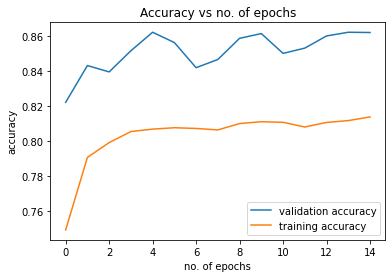

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.plot(np.arange(15), history.history['val_accuracy'], label= 'validation accuracy')
plt.plot(np.arange(15), history.history['accuracy'], label = 'training accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.title('Accuracy vs no. of epochs')
plt.legend()
plt.show()

Loss vs. no. of epochs

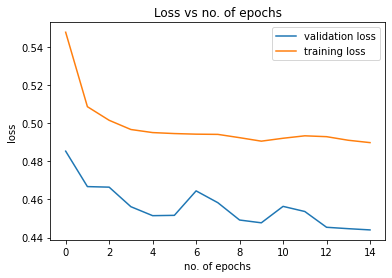

In [16]:
plt.figure(2)
plt.plot(np.arange(15), history.history['val_loss'], label= 'validation loss')
plt.plot(np.arange(15), history.history['loss'], label = 'training loss')
plt.xlabel('no. of epochs')
plt.ylabel('loss')
plt.title('Loss vs no. of epochs')
plt.legend()
plt.show()

#Evaluation

In [17]:
results = model.evaluate(data_val, batch_size = 128)
print(results)

52/52 [==============================] - 32s 614ms/step - loss: 0.4440 - accuracy: 0.8620
[0.44401466846466064, 0.861996054649353]


get true labels and predicted labels

In [18]:
y_val = []
y_pred = []
for image_batch, labels_batch in data_val:
  for label in labels_batch:
    y_val.append(label)
  for image in image_batch:
    y_pred.append(np.argmax(model.predict(image.numpy().reshape(1,224,224,3))))

#Classification Report and Confusion Matrix

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3156
           1       0.86      0.88      0.87      3467

    accuracy                           0.86      6623
   macro avg       0.86      0.86      0.86      6623
weighted avg       0.86      0.86      0.86      6623

[[2670  486]
 [ 428 3039]]


class '0' : female
class '1' : male

Confusion matrix:
total validation data = 6623

Number of female images = (2670+486) = 3156
Number of male images = (428+3039) = 3467

Classification accuracy for females = 100*(2670/3156) = 84.6%
Classification accuracy for males = 100*(3039/3467) = 87.65%

Therefore, we get the total accuracy as 86.2% (We got this value for model.evaluate())

#Visualizing wrong classification examples

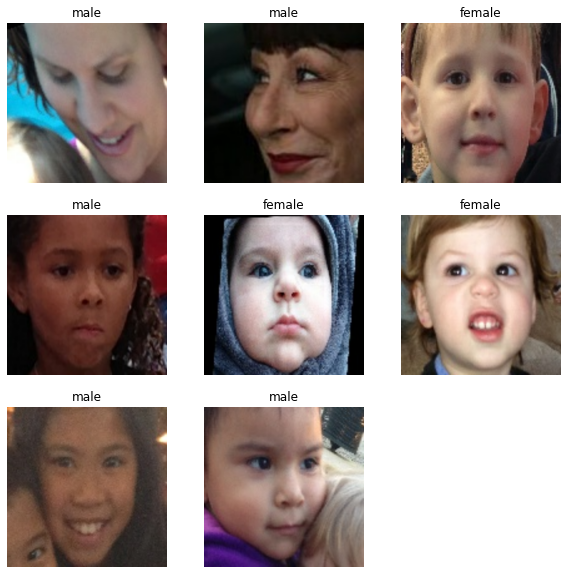

In [21]:
import matplotlib.pyplot as plt
i = 0
j = 0
plt.figure(figsize=(10,10))
for images, labels in data_val.take(1000):
    if i == 9:
      break
    pred = model.predict(images[j].numpy().reshape(1,224,224,3))
    pred = np.argmax(pred)
    if pred != labels[j]:
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[j].numpy().astype("uint8"))
      plt.title(data_val.class_names[pred])
      plt.axis("off")
      i+=1
    j+=1